## COVID-19 Analysis

### data source

https://github.com/CSSEGISandData/COVID-19

In [43]:
# data files
data_folder = "../../COVID-19/csse_covid_19_data/csse_covid_19_time_series"
data_file = data_folder + "/" + "time_series_19-covid-Deaths.csv"

In [116]:
import pandas as pd
import numpy as np

df = pd.read_csv(data_file)

In [117]:
# latest leaders

last_cols = np.concatenate((df.columns[0:2], df.columns[-17:]))
last_df = df[last_cols].sort_values(by=[last_cols[-1:][0]], ascending=False).transpose()
last_df = last_df[last_df.columns[:10]]
last_df

,154,16,155,18,157,156,403,98,443,1
Province/State,Hubei,NaN,NaN,NaN,France,NaN,United Kingdom,Washington,Netherlands,NaN
Country/Region,China,Italy,Iran,Spain,France,"Korea, South",United Kingdom,US,Netherlands,Japan
3/1/20,2761,34,54,0,2,17,0,0,0,6
3/2/20,2803,52,66,0,3,28,0,0,0,6
3/3/20,2835,79,77,1,4,28,0,0,0,6
3/4/20,2871,107,92,2,4,35,0,0,0,6
3/5/20,2902,148,107,3,6,35,1,0,0,6
3/6/20,2931,197,124,5,9,42,2,0,1,6
3/7/20,2959,233,145,10,11,44,2,0,1,6
3/8/20,2986,366,194,17,19,50,3,0,3,6


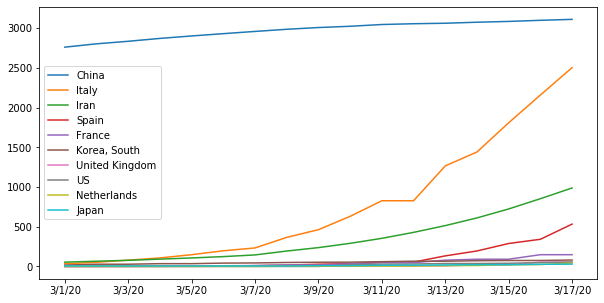

In [122]:
from matplotlib.pyplot import *

labels = last_df[1:2].values[0]
ax = last_df.tail(-2).plot(figsize=(10,5))
ax.legend(labels);


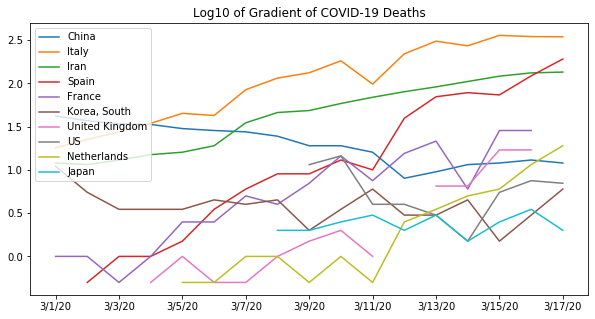

In [220]:
# plot log of gradient
grad_df = last_df.tail(-2).apply(np.gradient)
grad_df = grad_df.apply(np.log10)
ax = grad_df.plot(figsize=(10,5), title='Log10 of Gradient of COVID-19 Deaths')
ax.legend(labels);
